In [1]:
library(GLMsData)
data(gopher)

In [2]:
str(gopher)

'data.frame':	19 obs. of  6 variables:
 $ Site      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Latitude  : num  26.8 27.3 27.7 28 28.5 28.5 28.5 28.6 29.5 29.7 ...
 $ Evap      : int  1318 1193 1112 1171 1116 1116 1116 1198 1091 1091 ...
 $ Temp      : num  24 22.2 22.7 22.6 21.4 21.4 21.4 22.2 20.4 20.4 ...
 $ ClutchSize: num  8.2 6.5 7.6 7.1 4.8 5.8 8 7.5 5.8 5.8 ...
 $ SampleSize: int  23 8 32 19 12 16 19 24 62 51 ...


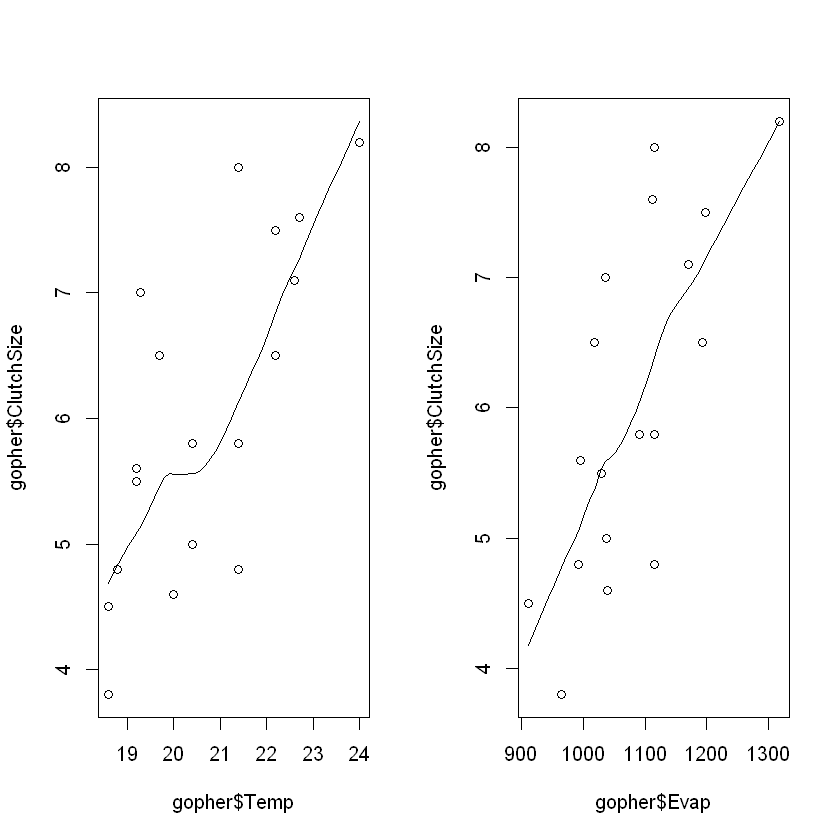

In [4]:
par(mfrow=c(1, 2))
scatter.smooth(gopher$ClutchSize ~ gopher$Temp)
scatter.smooth(gopher$ClutchSize ~ gopher$Evap)

In [5]:
lm.1 <- lm(ClutchSize ~ Temp + Evap, data=gopher, weights = SampleSize)

In [6]:
printCoefmat(coef(summary(lm.1)))

              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.0286641  2.6036632 -2.3155  0.03419 *
Temp         0.3510892  0.3503896  1.0020  0.33126  
Evap         0.0045504  0.0060808  0.7483  0.46512  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [7]:
anova(lm.1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Temp,1,434.27316,434.27316,21.7096383,0.0002617852
Evap,1,11.20181,11.20181,0.5599867,0.4651241815
Residuals,16,320.05925,20.00370,NA,NA


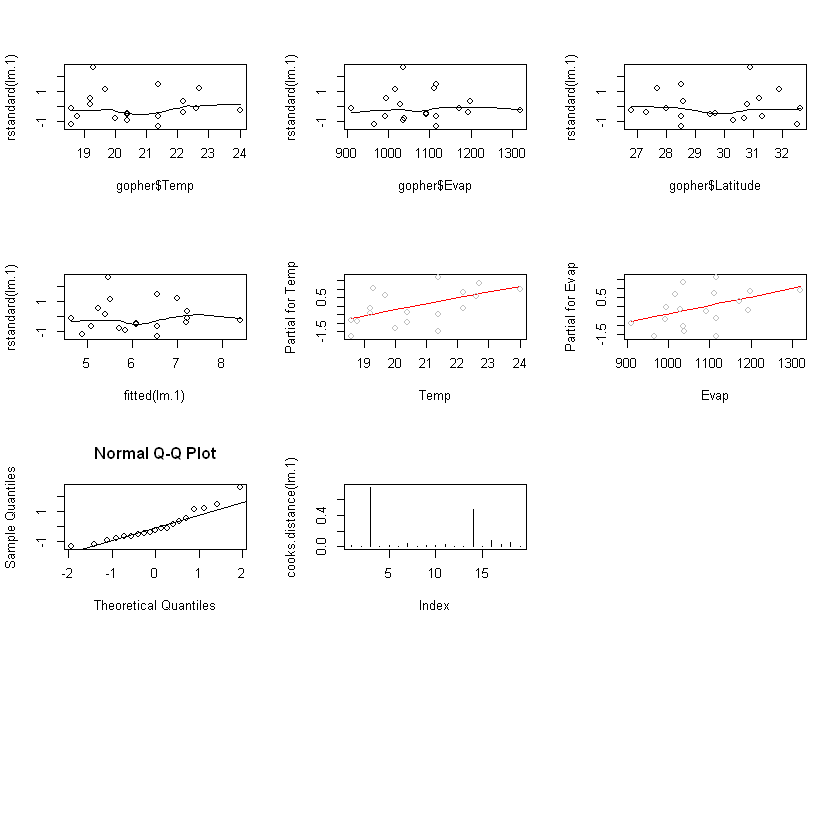

In [10]:
par(mfrow=c(4, 3))
scatter.smooth(rstandard(lm.1) ~ gopher$Temp)
scatter.smooth(rstandard(lm.1) ~ gopher$Evap)
scatter.smooth(rstandard(lm.1) ~ gopher$Latitude)
scatter.smooth(rstandard(lm.1) ~ fitted(lm.1))
termplot(lm.1, partial.resid = TRUE, terms="Temp")
termplot(lm.1, partial.resid = TRUE, terms="Evap")
qqnorm(rstandard(lm.1))
qqline(rstandard(lm.1))
plot(cooks.distance(lm.1), type="h")